In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import quandl
import numpy as np
import re

In [115]:
listings = pd.read_csv('data/listings.csv')
calendar = pd.read_csv('data/calendar.csv', parse_dates=True, index_col='date')
reviews = pd.read_csv('data/reviews.csv')
neighbourhoods = pd.read_csv('data/neighbourhoods.csv')

april_2017 = pd.read_csv('data/4_2018_calendar.csv') # 4/27/2018 - 2/23/2019
march_2017 = pd.read_csv('data/march_2017_calendar.csv', parse_dates=True, index_col='date') # 3/07/2017 - 12/31/2017

# 2017 March 10-19
# 2018 March 9-18

# 2018 - 2019 Austin Airbnb Dataset

### Source
insideairbnb.com

### Datasets
- listings.csv<br>
    - Detailed Listings data for Austin
<br>
<br>
- calendar.csv<br>
    * Detailed Calendar Data for listings in Austin

### Questions Explored
- **What are the busiest times of the year to visit Austin? By how much does prices spike?**
<br>
- **What is the impact on price from the number of available listings**

## Main Features
- available
- listing_id
- date
- price
- availability_365

<br>
**Notes**
- Months 9/12 - 12 are in 2018
- Months 1 - 9/11 are in 2019

In [3]:
price_calendar_df = calendar[calendar['available'] == 't']
# convert currency to Int
price_calendar_df = price_calendar_df[price_calendar_df.columns[2:]].replace('[\$,]', '', regex=True).astype(float)
calendar_df = calendar.iloc[:,:2]

In [4]:
def reservations():
    total = []
    for i in range(1,13):
        name = 'month '+str(i)
        try:
            if i == 9:
                count1 = calendar_df.loc['2019-9'].count() # 1st - 11th  
                count2 = calendar_df.loc['2018-9'].count() # 12th - 30th
                count = count1 + count2
                print(count)
            elif i == 10 or i == 11 or i == 12:
                count = calendar_df.loc['2018-'+str(i)].count()
            else:
                count = calendar_df.loc['2019-'+str(i)].count()
        except:
            name = 'month '+str(i)+" null"
        total.append((name, count))
        
    return total

def reservations_df():
    total = reservations()
    total = dict(total)
    total_df = pd.DataFrame(total)
    total_df.name = "2018 - 2019 Count"
    total_df = total_df.T # swap
    return total_df

In [5]:
def is_available(): 
    availabilities = []
    for i in range(1,13):
        name = 'month'+str(i)
        try:
            if i == 9:
                count1 = calendar_df[calendar_df['available'] == 't'].loc['2018-'+str(i)].count()
                count2 = calendar_df[calendar_df['available'] == 't'].loc['2019-'+str(i)].count()
                count = count1 + count2
            elif i == 10 or i == 11 or i == 12:
                count = calendar_df[calendar_df['available'] == 't'].loc['2018-'+str(i)].count()
            else:
                count = calendar_df[calendar_df['available'] == 't'].loc['2019-'+str(i)].count()
        except:
            name = str(name)+" is null"
        availabilities.append((name, count))
    return availabilities

def is_available_df():
    total = is_available()
    total = dict(total)
    total_df = pd.DataFrame(total)
    total_df.name = "2018 - 2019 availability"
    return total_df.T

In [6]:
def is_not_available(): 
    availabilities = []
    for i in range(1,13):
        name = 'month'+str(i)
        try:
            if i == 9:
                count1 = calendar_df[calendar_df['available'] == 'f'].loc['2018-'+str(i)].count()
                count2 = calendar_df[calendar_df['available'] == 'f'].loc['2019-'+str(i)].count()
                count = count1 + count2
            elif i == 10 or i == 11 or i == 12:
                count = calendar_df[calendar_df['available'] == 'f'].loc['2018-'+str(i)].count()
            else:
                count = calendar_df[calendar_df['available'] == 'f'].loc['2019-'+str(i)].count()
        except:
            name = str(name)+" is null"
        availabilities.append((name, count))
    return availabilities

def is_not_availability_df():
    total = is_not_available()
    total = dict(total)
    total_df = pd.DataFrame(total)
    return total_df.T

In [7]:
def price_listing():
    price_and_listing_quantity = []
    for i in range(1,13):
        try:
            if i == 9:
                available_count19 = price_calendar_df.price.loc['2019-'+str(i)].count()
                available_count18 = price_calendar_df.price.loc['2018-'+str(i)].count()
                available_count = available_count18 + available_count19
                
                price_2018_df = price_calendar_df.loc['2018-'+str(i)]
                price_2019_df = price_calendar_df.loc['2019-'+str(i)]
                
                combined_price_df = pd.concat([price_2018_df, price_2019_df])
                average_price = combined_price_df.mean()
                
                print(average_price)
            elif i == 10 or i == 11 or i == 12:
                available_count = price_calendar_df.price.loc['2018-'+str(i)].count()
                average_price = price_calendar_df.loc['2018-'+str(i)].mean()
            else:
                available_count = price_calendar_df.price.loc['2019-'+str(i)].count()
                average_price = price_calendar_df.loc['2019-'+str(i)].mean()
        except:
            available_count = str(i)
            average_price = "is null"
        price_and_listing_quantity.append((available_count, average_price))
        
    return price_and_listing_quantity

def price_listing_df():
    price_listings = price_listing()
    dict_df = dict(price_listings)
    df = pd.DataFrame(dict_df)
    return df.T

In [109]:
def price_over_time(): 
    values = []
    for i in range(1,13):
        name = 'month '+str(i)
        try:
            if i == 9:
                price_2018_df = price_calendar_df.loc['2018-'+str(i)]
                price_2019_df = price_calendar_df.loc['2019-'+str(i)]
                
                combined_price_df = pd.concat([price_2018_df, price_2019_df])
                average_price = combined_price_df.mean()
            elif i == 10 or i == 11 or i == 12:
                average_price = price_calendar_df.loc['2018-'+str(i)].mean()
            else:
                average_price = price_calendar_df.loc['2019-'+str(i)].mean()
        except:
            name = str(name)+" is null"
        values.append((name, average_price))
    return values

def price_over_time_df():
    over_time = price_over_time()
    dict_df = dict(over_time)
    df = pd.DataFrame(dict_df)
    return df.T

In [175]:
price_calendar_2017_df = march_2017[march_2017['available'] == 't']
price_calendar_2017_df = price_calendar_2017_df[price_calendar_2017_df.columns[2:]].replace('[\$,]', '', regex=True).astype(float)

def price_over_time_2017(): 
    values = []
    for i in range(1,13):
        name = 'month '+str(i)
        try:
            average_price = price_calendar_2017_df.loc['2017-'+str(i)].mean()
        except:
            average_price = np.nan
            name = str(name)
        values.append((name, average_price))
    return values

def price_over_time_2017_df():
    over_time = price_over_time_2017()
    dict_df = dict(over_time)
    df = pd.DataFrame(dict_df)
    return df.T

In [9]:
total_count_df = reservations_df()
total_availability_df = is_available_df()
total_not_available_df = is_not_availability_df()
total_count_df.available = total_availability_df.available.values
total_count_df['not available'] = total_not_available_df.available.values
cols = ['month 9', 'month 10', 'month 11', 'month 12', 'month 1', 'month 2', 'month 3', 'month 4', 'month 5', 'month 6', 'month 7', 'month 8']
total_count_df = total_count_df.reindex(cols)
available_and_nonavailable_count = total_count_df.drop(columns=['listing_id'])

listing_id    349770
available     349770
dtype: int64


## What are the busiest times of the year to visit Austin? By how much does prices spike?

From the data, not avaiable could also mean that the listing is off the market. Since not available doesn't fully mean the listing is booked on that day, we can't conclude that July and Augst are the busiest because the not available cout is the highest.

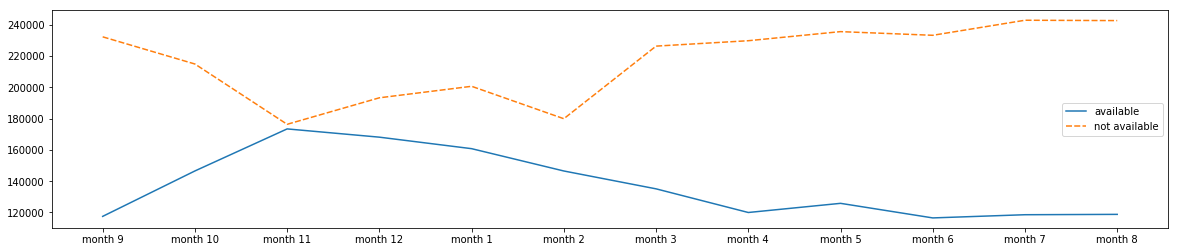

In [10]:
fig, ax = plt.subplots(figsize=(20,4)) 
ax = sns.lineplot(sort=False, data=available_and_nonavailable_count)

The number of available listings and not available listings adds up to the total number of listings

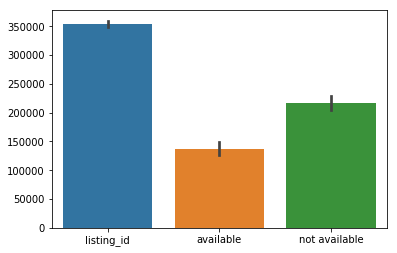

In [11]:
sns.barplot(data=total_count_df)

## What is the impact on price from the number of available listings

A huge spike in price is seen March, the number of listings is relatively for the year. The low supply and high demand could be the reason for the spike in price. 

**Reasons**
- SXSW 2019 (An internationally-recognized event) is set for March 8-17. This may have caused a spike in price from an average of \$370+ to an average of \$430+
- Rodeo Austin in March
- Urban Music Festival in March

price    335.144561
dtype: float64


[Text(0,0.5,'price'), Text(0.5,0,'number of listings')]

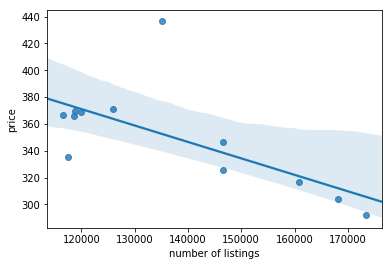

In [12]:
compare_price_with_quantity = price_listing_df()
ax_price_quantity = sns.regplot(x='index', y='price', data=compare_price_with_quantity.reset_index())
ax_price_quantity.set(xlabel='number of listings', ylabel='price')

[Text(0,0.5,'price')]

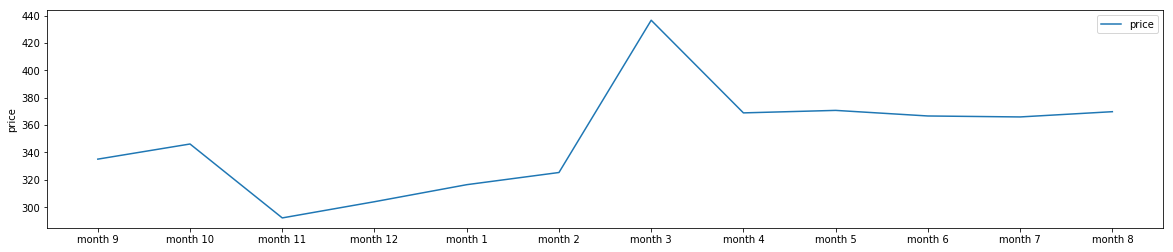

In [147]:
fig, ax_price_quantity = plt.subplots(figsize=(20,4)) 
over_time = price_over_time_df()
over_time = over_time.reindex(cols)
ax_price_quantity = sns.lineplot(sort=False, data=over_time)
ax_price_quantity.set(ylabel='price')

[Text(0,0.5,'price')]

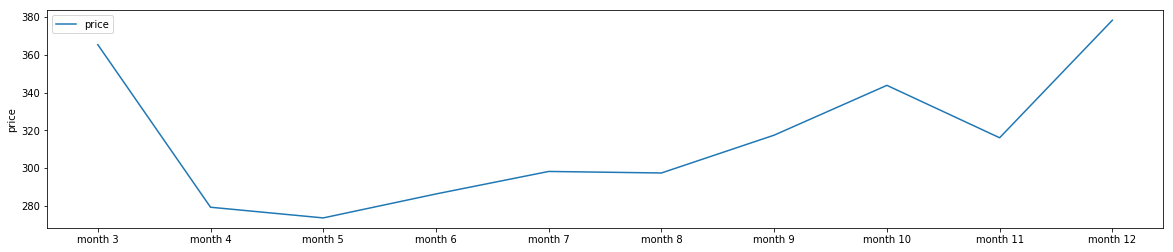

In [177]:
fig, ax_price_quantity_2017 = plt.subplots(figsize=(20,4)) 
over_time_2017 = price_over_time_2017_df().dropna() 
ax_price_quantity_2017 = sns.lineplot(sort=False, data=over_time_2017)
ax_price_quantity_2017.set(ylabel='price')

## Which neighbourhood has the most listings
East Downtown has the most listings filtered by unique Ids. Most likely because events happen around the downtown area.

Text(0,0.5,'Unique Id count')

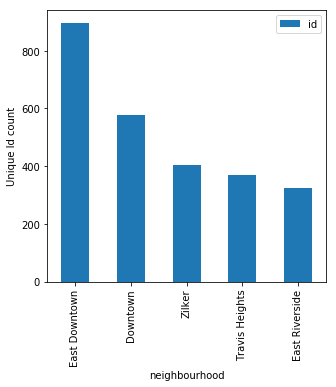

In [14]:
neighbourhood_listing_count = listings.groupby('neighbourhood')['id'].nunique().nlargest(5)
neighbourhood_listing_count_df = pd.DataFrame(neighbourhood_listing_count)
neighbourhood_listing_count_plot = neighbourhood_listing_count_df.plot(kind="bar",figsize=(5,5))
neighbourhood_listing_count_plot.set_ylabel("Unique Id count")

In [15]:
calendar = pd.read_csv('data/calendar.csv', parse_dates=True, index_col='date')
listings = pd.read_csv('data/listings.csv')

march_prices = calendar[['listing_id', 'available', 'price']][calendar.available == 't']['2019-03']
march_prices.price = march_prices['price'].replace('[\$,]', '', regex=True).astype(float)
march_average_prices_df = pd.DataFrame(march_prices.groupby('listing_id')['price'].mean())

avaiable_listings = calendar[['listing_id', 'available', 'price']][calendar.available == 't']
avaiable_listings.price = avaiable_listings['price'].replace('[\$,]', '', regex=True).astype(float)
avaiable_listings_avg_price = pd.DataFrame(avaiable_listings.groupby('listing_id')['price'].mean())

number_of_listings_per_year = listings.set_index('id').availability_365

## What is the average days each property is listed per year


In [16]:
number_of_listings_per_year.mean()

141.33459130285615

## What is the average number of listings per year?

- Most listings are rented out for less than 2 months out of the year.
- A large portion of listings are rented out for 95% of the year. 

Text(0,0.5,'number of listings')

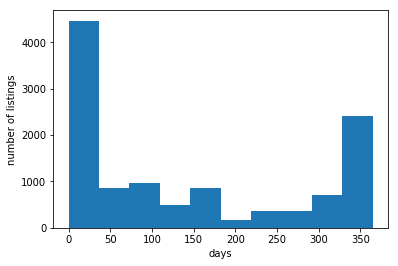

In [18]:
price_and_availability = pd.concat([avaiable_listings_avg_price,number_of_listings_per_year], axis=1)
price_and_availability['earnings'] = price_and_availability.price * price_and_availability.availability_365
price_and_availability.price.sort_values(ascending=False)
price_and_availability.dropna()
price_and_availability_plot = price_and_availability.availability_365.plot(kind="hist")
price_and_availability_plot.set_xlabel("days")
price_and_availability_plot.set_ylabel("number of listings")

# Conclusion

- Prices spike in March due to 
    - SXSW 2019 (An internationally-recognized event)
    - Rodeo Austin
    - Urban Music Festival
- Downtown has the most amount of listings
- Most listings are rented out for less than 2 months out of the year.
- The second majority of listings are available for an average of more than 90% of the year.